# 선형 회귀

선형 회귀를 해결하기 위한 알고리즘은 매우 많다.

경사 하강법, 정규 방정식, 결정 트리, 서포트 백터 머신. 

이번에는 경사 하강법에 대해 알아보자.

## (1) 데이터 처리

In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LinearLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

class MyData:
    def __init__(self):
        self.file_clean = "./data/point_clean.csv"
        self.file_noisy = "./data/point_noisy.csv"
    
    def get_data_clean(self):
        dc = np.genfromtxt(self.file_clean, delimiter = ',')
        return dc

    def get_data_noisy(self):
        dn = np.genfromtxt(self.file_noisy, delimiter = ',')
        return dn
    
    def get_grid(self, data):
        data = data.reshape(-1, 1)
        size = int(data.shape[0] ** (1/2))
        grid_data = data.reshape(size, size)
        return grid_data

## (2) 데이터 시각화

400 (400,) (400,)
(400,) (400,) (400,)


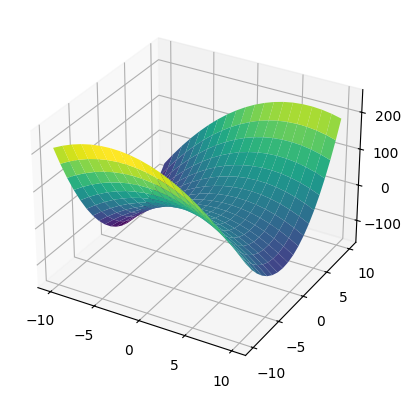

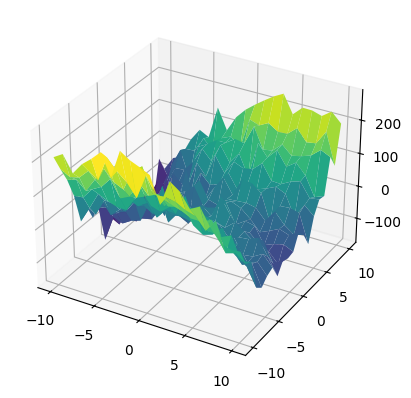

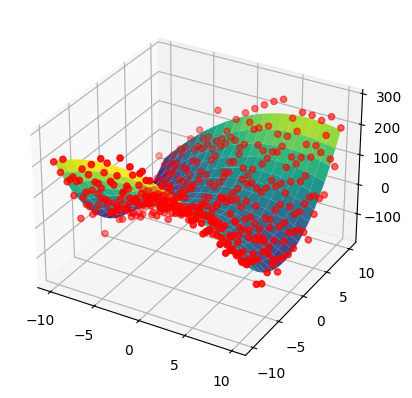

In [ ]:
class MyPlot:
    def __init__(self):
        self.fig_size = (8,8)
    
    def plot_data(self, x, y, z):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(x, y, z, cmap = 'viridis')
    
    def plot_data_point(self, x, y, z, x_point, y_point, z_point):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot_surface(x, y, z, cmap = 'viridis')
        ax.scatter(x_point, y_point, z_point, color = 'r')

plot = MyPlot()
data = MyData()

data_clean = data.get_data_clean()
data_noisy = data.get_data_noisy()
x_clean = data_clean[0]
y_clean = data_clean[1]
z_clean = data_clean[2]

x_noisy = data_noisy[0]
y_noisy = data_noisy[1]
z_noisy = data_noisy[2]

grid_x_clean = data.get_grid(x_clean)
grid_y_clean = data.get_grid(y_clean)
grid_z_clean = data.get_grid(z_clean)

grid_x_noisy = data.get_grid(x_noisy)
grid_y_noisy = data.get_grid(y_noisy)
grid_z_noisy = data.get_grid(z_noisy)

print(x_clean.shape, y_clean.shape, z_clean.shape)
print(x_noisy.shape, y_noisy.shape, z_noisy.shape)
plot.plot_data(grid_x_clean, grid_y_clean, grid_z_clean)
plot.plot_data(grid_x_noisy, grid_y_noisy, grid_z_noisy)
plot.plot_data_point(grid_x_clean, grid_y_clean, grid_z_clean, x_noisy, y_noisy, z_noisy)

(3) 학습과정은 z_hat 계산 - z - z_hat 계산 - loss 미분 최소가되는 방향 - 갱신 갱신된걸로 다시 z_hat 계산

In [ ]:
class MyModel:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.w = np.random.randn((6, 1))
        self.b = np.zeros(6, 1)
        self.feature = None
    
    def get_feature(self, x, y):
        self.feature = np.column_stack((np.ones((x.shape[0], 1)),x, y, x**2, x*y, y**2))
    
    def predict(self):
        z_hat = self.feature @ self.w
        return z_hat
    
    def get_loss(self, z, z_hat):
        loss = (1 / (z.shape[0])) * ((z - z_hat) **2)
        return loss
    
    def get_gradient(self):
        
    


    


    
